In [1]:
from Maze import Maze
import numpy as np
import random
from tqdm import tqdm
import pygame
import sys
import matplotlib.pyplot as plt


pygame 2.6.1 (SDL 2.28.4, Python 3.13.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Maze()
possible_num_state = 186# ספרנו את כל הסטייטים האפשריים במבוך והחסרנו אחד כי בפייתון אנחנו מתחילים מ 0
action_space = 4 # ימינה שמאלה למעלה למטה

In [3]:
def create_qtable(possible_num_state,action_space):
    Qtable = np.zeros((possible_num_state,action_space)) # בהתחלה הטבלה מתחילה עם אפסים ואז מתעדכנת לערכים של Q
    return Qtable


def greedy_policy(Qtable,state):
    action = np.argmax(Qtable[state][:]) #יצירת מדיניות חמדנית שלוקחת את הערך הכי גבוה באותו הסטייט בטבלה

    return action

def epsilon_greedy_policy(Qtable, state, epsilon): # אם האפסילון גדול חוקרים יותר ועושים פעולות רנדומליות ,אם הוא קטן עושים ניצול לידע הקיים 
 
  random_num = random.random()
  
  if random_num > epsilon:
    
    action =greedy_policy(Qtable,state)
  
  else:
    action = random.randint(0, 3)

  return action





In [4]:
## פרמטרים
n_training_episodes = 1500
learning_rate = 0.7 
max_steps = 150 
gamma = 0.95
max_epsilon = 1.0 
min_epsilon = 0.05 
decay_rate = 0.0005

In [5]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
    total_rewards_per_episode = []

    for episode in range(n_training_episodes):
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        state = env.reset()
        total_reward = 0
        done = False

        for step in range(max_steps):
            action = epsilon_greedy_policy(Qtable, state, epsilon)
            new_state, reward, done = env.step(action)
            Qtable[state][action] = Qtable[state][action] + learning_rate * (
                reward + gamma * max(Qtable[new_state]) - Qtable[state][action]
            )
            total_reward += reward
            state = new_state
            if done:
                break

        total_rewards_per_episode.append(total_reward)

    return Qtable, total_rewards_per_episode


In [6]:
def moving_average(data, window_size=10):
    return [np.mean(data[max(0, i - window_size):i + 1]) for i in range(len(data))]


In [7]:
qtable_maze = create_qtable(possible_num_state,action_space)
qtable_maze ,total_rewards_per_episode= train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, qtable_maze)

In [8]:
def plot_rewards(rewards, window_size=10):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label='Cumulative Reward', alpha=0.5)

    smoothed = moving_average(rewards)
    plt.plot(smoothed, label=f'Smoothed', color='red')

    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

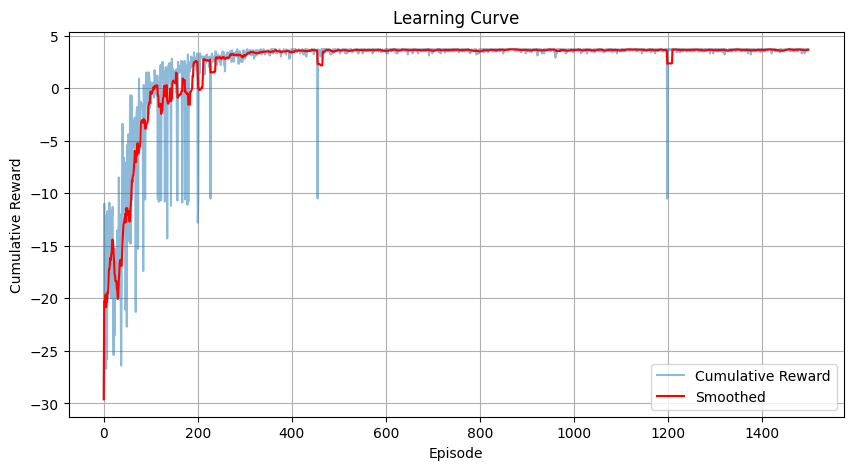

In [9]:
qtable, rewards = train(
    n_training_episodes=1500,
    min_epsilon=0.01,
    max_epsilon=1.0,
    decay_rate=0.01,
    env=env,
    max_steps=200,
    Qtable=qtable_maze
)

plot_rewards(rewards)


In [10]:
def run_single_episode(env, Q_table, max_steps=200):
    state = env.reset()
    done = False

    pygame.init()

    CELL_SIZE = 80
    ROWS, COLS = 15, 15
    WIDTH, HEIGHT = COLS * CELL_SIZE, ROWS * CELL_SIZE
    screen = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Q-Learning Agent Evaluation")
    clock = pygame.time.Clock()

    env.load_images()  

    for _ in range(max_steps):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()

        action = np.argmax(Q_table[state])
        state, reward, done = env.step(action)

        env.render(screen)
        pygame.display.flip()
        clock.tick(4)

        if done:
            print("Episode finished!")
            pygame.time.wait(500)
            break

    pygame.quit()  


In [18]:
run_single_episode(env, qtable_maze)

Episode finished!
